<a href="https://colab.research.google.com/github/Emersonmiady/imagem-corporal-estat/blob/main/imagem_corporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Imagem corporal na adolescência: uma análise com a Estatística**


---
## **Contextualização**


### **O que é imagem corporal?**
A imagem corporal é a impressão que uma pessoa tem do seu próprio corpo e os pensamentos e sentimentos a respeito. Também podemos pensar a imagem corporal como sendo a maneira como você se vê quando se olha no espelho ou quando você se imagina em sua mente.  Ela é a representação mental do nosso corpo, é a forma como nos vemos e pensamos fisicamente,  também é a forma como acreditamos que os outros nos vêem.

<center><img src="https://github.com/Emersonmiady/imagem-corporal-ds/blob/main/img/body_impression.jpg?raw=true" height=350>

### **Como é construída?**
A imagem corporal é uma noção que vamos adquirindo com o tempo, a partir das **nossas culturas e histórias pessoais**. Ela está muito ligada a nossas **experiências afetivas com os outros e as pessoas que nos cercam**.

Quando somos jogados para conviver em sociedade, acabamos nos deparando com certos "padrões de beleza", e que muita das vezes, não são fáceis de serem adquiridos. Infelizmente aquilo é tratado como "normal", e a insatisfação pelo próprio corpo é algo que pode sim se desenvolver.

<center><img src="https://github.com/Emersonmiady/imagem-corporal-ds/blob/main/img/beauty_and_social_medias.jpg?raw=true" width=900 height=300></center>

### **Qual a sua importância?**
Saber o que um indivíduo pensa sobre seu corpo é de extrema importância, pois uma imagem corporal negativa pode levar a sentimentos negativos, como a tristeza, melancolia e o desânimo. 

Pode levar ao constrangimento pessoal, fazendo com que a exposição publica se torne um terror psicológico, e assim, desencadeando um isolamento social constante.

Caso essa visão se torne mais grave, é possível que desencadeie problemas mais sérios de saúde, como a anorexia, bulimia e depressão. Em casos extremos, o **suicídio** pode se tornar real...

Em suma, existem muitas consequências negativas caso a sua imagem corporal não esteja saudável, e tudo isso desconfigura a própria personalidade, fazendo com que ela se esqueça da sua essência, suas emoções, do que ela "realmente é".

<center><img src="https://github.com/Emersonmiady/imagem-corporal-ds/blob/main/img/depression.jpg?raw=true" height=300></center>




### **Um aviso**
Caso você, leitor, que esteja passando por algum pensamento negativo a respeito do tema, repense se realmente vale a pena deixar de ser quem você é, de amar a si próprio... 

Na minha opinião, não é algo benéfico, não podemos nos apegar a essas imagens perfeitas "para ser" ou "para existir", temos que tomar consciência de que somos pessoas, e pessoas possuem qualidades não somente físicas, mas emocionais.

Não precisamos seguir tendências, o que realmente importa é que somos pessoas legais e comuns como todas as outras. Todos temos problemas e defeitos, afinal, somos seres humanos, certo? 

Então anime-se, cuide da sua saúde e de sua imagem da melhor forma, a que mais te agrada e te faça se sentir livre! :)

---
## **Um pouco sobre o projeto**

### **Bibliotecas utilizadas**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
from IPython.display import Javascript
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

### **Funções criadas**

In [ ]:
# Função para fazer a descrição do código da pergunta
def make_description_of_question(id):
  question_description = pd.DataFrame(columns=['VARIÁVEL',
                                               'DESCRIÇÃO'])
  variables = []
  description = []
  id_index = dictionary_df.query('VARIÁVEL == @id').index[0]
  
  dictionary_copy = dictionary_df.copy()
  dictionary_copy['VARIÁVEL'] = pd.to_numeric(dictionary_copy['VARIÁVEL'], 
                                              errors='coerce', 
                                              downcast='integer')

  first_answer_index = id_index + 1
  iterator = 0
  for variable in pd.isna(dictionary_copy.iloc[first_answer_index:, 0]):
    if variable == False:
      variables.append(dictionary_copy.iloc[first_answer_index + iterator, 0])
      description.append(dictionary_copy.iloc[first_answer_index + iterator, 1])
      iterator += 1
    else:
      break

  question_description['VARIÁVEL'] = variables
  question_description['DESCRIÇÃO'] = description

  question_description.set_index('VARIÁVEL', inplace=True)

  return question_description

In [ ]:
# Função para mostrar a descrição do código da pergunta
def show_description_of_question(id):
  print(f'ID da pergunta: {id}')
  print(dict_student[id])
  display(make_description_of_question(id))

In [ ]:
# Função para fazer uma tabela de frequências, já com o dicionário das variáveis
def make_freq_table(id, df):
  quest_dict = make_description_of_question(id)

  freq_table = (df.copy()[id].value_counts()).to_frame(name='Frequência absoluta')
  freq_table['Frequência relativa (%)'] = df.copy()[id].value_counts(normalize=True) * 100
  freq_table['Frequência relativa (%)'] = round(freq_table['Frequência relativa (%)'], 2)
  freq_table = freq_table.join(quest_dict).set_index('DESCRIÇÃO')
  return freq_table

In [ ]:
# Função para mostrar a tabela de frequências com a pergunta
def show_freq_table(id, df):
  print(dict_student[id], '\n')
  display(make_freq_table(id, df))

In [ ]:
# Função para traduzir as variáveis dentro da pergunta
def translate_column_vars(id, df):
  quest_dict = dict(make_description_of_question(id)['DESCRIÇÃO'])
  df_copy = df.copy()
  df_copy[id] = df_copy[id].map(quest_dict)
  
  return df_copy[id]

In [ ]:
# Função para fazer um pivot table entre 2 variáveis
def make_pivot_table(id_1, id_2, df, margins=True, cmap='Blues'):
  quest_name_1 = dict_student[id_1]
  quest_name_2 = dict_student[id_2]

  df_copy = df.copy()
  df_copy[id_1] = translate_column_vars(id_1, df)
  df_copy[id_2] = translate_column_vars(id_2, df)

  if margins == True:
    pivot_table = pd.crosstab(index=df_copy[id_1], columns=df_copy[id_2], 
                              rownames=[quest_name_1],
                              colnames=[quest_name_2],
                              margins=margins,
                              margins_name='Total')
  else:
    pivot_table = pd.crosstab(index=df_copy[id_1], columns=df_copy[id_2], 
                              rownames=[quest_name_1],
                              colnames=[quest_name_2])

  return pivot_table

In [ ]:
# Função para mostrar o pivot table com a pergunta
def show_pivot_table(id_1, id_2, df, margins=True, cmap='Blues'):
  print(f'Tabela dinâmica entre "{id_1}" e "{id_2}"\n')
  display(make_pivot_table(id_1, id_2, df, margins, cmap))

In [ ]:
# Função para fazer um pivot table percentual entre 2 variáveis
def make_percentage_pivot_table(id_1, id_2, normalization, df):
  quest_name_1 = dict_student[id_1]
  quest_name_2 = dict_student[id_2]

  df_copy = df.copy()
  df_copy[id_1] = translate_column_vars(id_1, df)
  df_copy[id_2] = translate_column_vars(id_2, df)

  pivot_table = round((pd.crosstab(index=df_copy[id_1], columns=df_copy[id_2], 
                             normalize=normalization,
                             rownames=[quest_name_1],
                             colnames=[quest_name_2]) * 100), 2)

  return pivot_table

In [ ]:
# Função para "meltar" a tabela de contingência percentual
def melt_pct_df(id_1, id_2, normalization, df):
  wanted_df = make_percentage_pivot_table(id_1, id_2, normalization, 
                                          pense_student).reset_index()
  wanted_df = pd.melt(wanted_df, id_vars=[dict_student[id_1]],
                      value_vars=wanted_df.columns[1:],
                      value_name='Frequência relativa (%)')
  return wanted_df

In [ ]:
# Função para mostrar um pivot table percentual entre 2 variáveis
def show_percentage_pivot_table(id_1, id_2, normalization, df, cmap='Blues'):
  pivot_table = make_percentage_pivot_table(id_1, id_2, normalization, df)

  if normalization == 'index':
    print(f'Tabela dinâmica percentual por linha entre "{id_1}" e "{id_2}"\n')
    display(pivot_table.style.set_table_attributes("class='dataframe'").background_gradient(cmap=cmap, 
                                                                                            axis=1).set_precision(2))
  if normalization == 'columns':
    print(f'Tabela dinâmica percentual por coluna entre "{id_1}" e "{id_2}"\n')
    display(pivot_table.style.set_table_attributes("class='dataframe'").background_gradient(cmap=cmap, 
                                                                                            axis=0).set_precision(2))

In [ ]:
# Função para fazer o teste qui-quadrado em uma única variável
def do_chi2(array):
  alpha = 0.05
  dof = len(array) - 1
  chisq, p_value = chisquare(array)

  print('- Nível de significância:', alpha)
  print('- P-valor:', p_value)
  print('- Graus de liberdade:', dof)
  print('- Valor qui-quadrado:', chisq)

  critical_chi2 = chi2.ppf(q=1-alpha, df=dof)

  if chisq < critical_chi2:
    print('\n- Resultado: aceitação da hipótese nula.')
  else:
    print('\n- Resultado: rejeição da hipótese nula.')

In [ ]:
# Função para fazer o teste qui-quadrado em 2 variáveis
def do_chi2_contingency(df):
  alpha = 0.05
  chisq, p_value, dof, expected_values = chi2_contingency(df)

  print('- Nível de significância:', alpha)
  print('- P-valor:', p_value)
  print('- Graus de liberdade:', dof)
  print('- Valor qui-quadrado:', chisq)

  critical_chi2 = chi2.ppf(q=1-alpha, df=dof)

  if chisq < critical_chi2:
    print('\n- Resultado: aceitação da hipótese nula.')
  else:
    print('\n- Resultado: rejeição da hipótese nula.')

### **Resumo**
Assim como relatado acima, a imagem corporal é um tema que deve ter a sua devida atenção, principalmente com o avanço tecnológico nesses últimos anos, em que as redes sociais vêm, cada vez mais, fazendo parte das nossas vidas.

Ter aquele "corpo perfeito" dos(as) nossos(as) amigos(as) ou influenciadores, publicados em suas redes sociais, podem acabar interferindo muito na visão do próprio corpo, prejudicando assim, a saúde física e mental. Além disso, podem existir outras pressões externas, como o bullying, que podem vir a atormentar ainda mais o psicológico sobre o assunto.

Entender o que acontece na mente dos menores é muito importante, afinal, elas que tomarão conta do mundo no futuro, passando os conhecimentos para as próximas gerações.

Sendo assim, neste projeto será realizado uma análise exploratória a respeito da imagem corporal dos jovens e um pouco sobre o bullying na adolescência.

Para isso, vou estar utilizando uma base de dados do [IBGE](https://www.ibge.gov.br/pt/inicio.html), a 2ª amostra do [PeNSE 2015](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e). Mais informações da base abaixo.

### **PeNSE 2015**

#### **O que é**
É um questionário no qual investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.  



#### **Histórico**
A Pesquisa Nacional de Saúde do Escolar - PeNSE teve início em 2009, fruto de parceria com o Ministério da Saúde e apoio do Ministério da Educação. Na primeira edição, os escolares do 9º ano do ensino fundamental (antiga 8ª série) das escolas públicas e privadas dos Municípios das Capitais constituíram sua população-alvo. A escolha do 9º ano do ensino fundamental, cabe destacar, teve como justificativa o mínimo da escolarização necessária para responder questionário autoaplicável e também a proximidade da idade de referência preconizada pela Organização Mundial da Saúde - OMS (World Health Organization - WHO), que é de 13 a 15 anos. 

Em 2012, embora mantida sua população-alvo, a PeNSE passou a abarcar dados para o conjunto do País e as Grandes Regiões, e a investigar, também, algumas características do ambiente escolar e do entorno. 

Na edição de 2015, importantes inovações foram introduzidas na pesquisa, dentre as quais se destaca a disponibilização de informações oriundas de dois planos amostrais distintos: escolares frequentando o 9º ano do ensino fundamental e escolares de 13 a 17 anos de idade frequentando as etapas do 6º ao 9º ano do ensino fundamental (antigas 5ª a 8ª séries) e da 1ª a 3ª série do ensino médio. 
- A primeira amostra, tradicional da PeNSE, não só permite a comparação temporal entre os Municípios das Capitais nas três edições da pesquisa, como também possibilita a desagregação das informações por Unidades da Federação, oferecendo, assim, dados de saúde mais próximos da realidade local desses estudantes;
- A segunda amostra, por sua vez, proporciona melhor identificação e acompanhamento de fatores relacionados ao desenvolvimento físico-biológico e ao tempo de exposição às condições de risco para o grupo etário considerado, e viabiliza maior comparabilidade com indicadores internacionais, em especial aqueles provenientes da OMS.

#### **Tópicos abordados**
- A pesquisa fornece informações sobre as características básicas da população de estudo, incluindo aspectos socioeconômicos, como:
  - Escolaridade dos pais;
  - Inserção no mercado de trabalho e posse de bens e serviços;
  - Contextos social e familiar;
  - Fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas;
  - Saúde sexual e reprodutiva; 
  - Exposição a acidentes e violências;
  - Hábitos de higiene; 
  - Saúde bucal;
  - Saúde mental;
  - Percepção da imagem corporal, entre outros tópicos. 
- Características do ambiente escolar e do entorno são também contempladas, incluindo:
  - Informações relacionadas à infraestrutura disponível para alimentação e atividade física; 
  - Acessibilidade; 
  - Saneamento básico; 
  - Existência de regras e normas de conduta adotadas pelas escolas; 
  - Políticas de assistência à saúde; 
  - Nível de segurança do entorno, entre outros aspectos.

#### **Mais algumas informações**
- A periodicidade da pesquisa é eventual;
- Sua abrangência geográfica é nacional: na edição de 2015, realizada com dois planos amostrais distintos, os resultados da amostra 1 estão disponíveis para Brasil, Grandes Regiões, Unidades da Federação e Municípios das Capitais; e para a amostra 2, Brasil e Grandes Regiões.
- Aqui vai um vídeo curto explicativo, sobre a base de dados a ser estudada:

In [ ]:
# Exibindo um vídeo explicativo sobre o PeNSE 2015
HTML('<center><iframe width="853" height="480" src="https://www.youtube.com/embed/z4BBCHZUvD4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"></iframe></center>')

#### **Descrição dos dados**

In [ ]:
# Importando os dados dos alunos para um DataFrame e visualizando uma prévia dos dados
student_path = '/content/drive/MyDrive/Alura Bootcamp DS/Módulo 3/PeNSE_2015_AMOSTRA2/arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

pense_student = pd.read_csv(student_path, sep=';', thousands='.', decimal=',')
pense_student.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
# Vendo a dimensão do DataFrame
print(f'Quantidade de pessoas que responderam: {pense_student.shape[0]}')
print(f'Quantidade de questões: {pense_student.shape[1]}')

Quantidade de pessoas que responderam: 16556
Quantidade de questões: 181


Acima temos a base de dados principal que vamos estar utilizando (somente as informações dos alunos) e a seguir, temos o dicionário de suas variáveis (colunas).

In [ ]:
# Importando os dados do dicionário dos alunos para um DataFrame
dict_path_in_drive = '/content/drive/MyDrive/Alura Bootcamp DS/Módulo 3/PeNSE_2015_AMOSTRA2/Dicionario_PENSE_Microdados_AMOSTRA2.xls'

dictionary_df = pd.read_excel(dict_path_in_drive, sheet_name='AMOSTRA2_ALUNO')
dictionary_df.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
# Criando um resumo do dicionário do Pense somente com as perguntas,
# em formato de dicionário (python)
dict_student = {}
for i in range(len(dictionary_df)):
  try:
    int(dictionary_df.iloc[i, 0])
  except ValueError:
    dict_student[dictionary_df.iloc[i, 0]] = dictionary_df.iloc[i, 1]

In [ ]:
# Fazendo algumas alterações e exibindo o dicionário
dict_student.pop('0 a 2999')
print("Nome da variável no DataFrame': 'Descrição da pergunta'\n")
dict_student

Nome da variável no DataFrame': 'Descrição da pergunta'



{'ANOPESQ': 'Ano em que a pesquisa foi realizada',
 'ESTRATOGEOREG': 'Indicador de estrato georeg',
 'ESTRATO_EXP': 'Expressão do estrato',
 'PAIS': 'País',
 'PESO': 'Peso do aluno de acordo com a amostra, utilizado para expansão',
 'REGEOGR': 'Região geográfica',
 'TEMPODESLOC': 'Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.',
 'TEMPOEDFIS': 'Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar fez atividade física ou esporte durante as aulas de educação física na escola. Em minutos.',
 'TEMPOEST': 'A atividade física globalmente estimada refere-se ao número de dias que os escolares declararam fazer, pelo menos, uma hora por dia de atividade física, nos sete dias anteriores à pesquisa. Em minutos.',
 'TEMPOEXTRA': 'Refere-se ao tempo médio diário acumulado pelo escolar com a prática de algu

As iniciais das variáveis dão uma idéia do que tal pergunta se trata. Desse modo, facilita bastante a busca pelas variáveis! 

Sendo assim, resumi pelo tema que cada inicial das variáveis indicam: 

- **REGEOGR** - Região geográfica;

- **TEMPO...** - Tempo de VB03;

- **VB00004** - Concorda em participar deste questionário?;

- **V000X** - Informações da escola (X = {6, 7, 8, 41});

- **VB01** - Dados socio-econômicos;

- **VB02** - Alimentação;

- **VB03** - Ida e vinda para a escola + Atividades físicas;

- **VB04** - Uso de produtos derivados do tabaco;

- **VB05** - Bebidas alcóolicas;

- **VB06** - Drogas ilícitas;

- **VB07** - Relacionamentos entre família e amigos (Bullying);

- **VB08** - Relação sexual;

- **VB09** - Segurança na rua + segurança no transito + agressões;

- **VB10** - Higiene;

- **VB11** - Imagem corporal;

- **VB12** - Solidão;

- **VB13** - Saúde + vacinação;

- **VB14** - Problemas respiratórios;

- **VB16** - Impressões sobre o questionário;

- **VB17** - Peso e altura.

**Observação:** não resumi acima todas as variáveis, apenas as mais importantes.

#### **É realmente confiável?**
Na seção "Mais algumas informações", foi apresentado um vídeo relatando que os alunos se sentem confortáveis e as respostas não chegam enviesadas por algum fator. Entretanto, não dá para saber completamente se isso é verdade.

Para ter mais certeza a respeito disso, vamos verificar o que os alunos realmente sentiram ao responder as perguntas.

In [ ]:
# Variáveis a serem utilizadas
var_about_quest = dictionary_df.loc[dictionary_df['VARIÁVEL'].str.contains('VB16') == True]['VARIÁVEL']

for id in var_about_quest:
  show_description_of_question(id)
  print('\n')

ID da pergunta: VB16001A01
Você achou este questionário fácil?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB16001A02
Você achou este questionário difícil?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB16001A03
Você achou este questionário chato?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB16001A04
Você achou este questionário legal?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB16001A05
Você achou este questionário interessante?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB16001A06
Você achou este questionário informativo?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB16001A07
Você achou este questionário cansativo?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB16001A08
Você achou este questionário constrangedor?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado


In [ ]:
# Exibindo as perguntas e alternativas sobre o próprio questionário
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
for id in var_about_quest:
  show_freq_table(id, pense_student)
  print('\n')

<IPython.core.display.Javascript object>

Você achou este questionário fácil? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,9613,58.06
Sim,6861,41.44
Não informado,82,0.50




Você achou este questionário difícil? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,16159,97.6
Sim,315,1.9
Não informado,82,0.5




Você achou este questionário chato? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,15156,91.54
Sim,1318,7.96
Não informado,82,0.50




Você achou este questionário legal? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,13408,80.99
Sim,3066,18.52
Não informado,82,0.50




Você achou este questionário interessante? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,10818,65.34
Sim,5656,34.16
Não informado,82,0.50




Você achou este questionário informativo? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,15275,92.26
Sim,1199,7.24
Não informado,82,0.50




Você achou este questionário cansativo? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,15374,92.86
Sim,1100,6.64
Não informado,82,0.50




Você achou este questionário constrangedor? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,16285,98.36
Sim,189,1.14
Não informado,82,0.50


- Sendo bem exato, as duas primeiras perguntas são contraditórias, entretanto tiveram porcentagens bem estranhas. **Talvez a maioria dos adolescentes acharam esse questionário não tão fácil de ser respondido, mas que também não foi absolutamente difícil.** O ideal é colocar níveis de dificuldade para elas responderem;
- O mesmo acontece para a terceira e quarta pergunta, elas são contraditórias mas **as pessoas acharam o questionário não tão chato quanto também não tão legal**, se posicionando em um meio termo;
- **65,34% dos adolescentes não achou o questionário interessante**;
- **92,26% dos adolescentes não achou o questionário informativo**;
- **92,86% dos adolescentes não achou o questionário cansativo**;
- **98,36% dos adolescentes não achou o questionário constrangedor**.

Concluímos então que, as únicas reclamações majoritárias foram em relação a **dificuldade** (média) do questionário, a **diversão** (média) e ao **interesse** (baixo) em respondê-lo. Não houve, em sua grande parte, constrangimento e cansaço, sendo assim podemos supor que, a maioria das respostas não possui um viés distorcivo.

Estamos um pouco mais seguros quanto a confiança das respostas dos entrevistados. 


---
## **Análise exploratória**


### **Verificando valores faltantes**

Antes de começar a análise de fato, é sempre uma boa prática verificarmos os dados faltantes no DataFrame!

In [ ]:
# Tabela de contagem dos valores nulos por variável
na_count_table = pense_student.isna().sum().reset_index()
na_count_table.rename({'index':'variavel', 0:'contagem'}, axis=1, inplace=True)
na_count_table.head()

,variavel,contagem
0,ANOPESQ,0
1,PAIS,0
2,REGEOGR,0
3,VB00004,0
4,VB01001,0


In [ ]:
# Variáveis que apresentam valores nulos
variables_with_na = na_count_table.query('contagem != 0')
display(variables_with_na)

,variavel,contagem
58,TEMPODESLOC,33
59,TEMPOTOTAL,20
60,TEMPOEDFIS,84
61,TEMPOEXTRA,93
62,TEMPOEST,110
165,VB17001,45
166,VB17002,47


In [ ]:
# Verificando o que são essas variáveis
for variable in variables_with_na['variavel']:
  print(f'{variable}: {dict_student[variable]}\n')

TEMPODESLOC: Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.

TEMPOTOTAL: A atividade física acumulada foi estimada calculando o produto entre o número de dias e o tempo médio que os escolares gastam em atividades físicas, nos sete dias anteriores à pesquisa, considerando os seguintes domínios: ir e voltar da escola, aulas de educação física e outras atividades extraescolares. Em minutos.

TEMPOEDFIS: Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar fez atividade física ou esporte durante as aulas de educação física na escola. Em minutos.

TEMPOEXTRA: Refere-se ao tempo médio diário acumulado pelo escolar com a prática de alguma atividade física extraescolar como esportes, dança, ginástica, musculação, lutas ou outra atividade, nos últimos sete dias anteriores à data da pesquisa. Em minuto

Aparentemente essas variáveis são valores contínuos e que, para as nossas futuras análises, não serão tão interessantes. Sendo assim, creio que não é preciso se preocupar com elas.

**Observação:** O peso e a altura estão melhor representados nas variáveis "**VB17003**" e "**VB17004**", respectivamente.

### **Idéia descartada e inspirações**
A imagem corporal não foi um tema que pensei de primeira. Na verdade, a primeira coisa que fiz foi buscar algo voltado para o **bullying na adolescência**. Descobri algumas coisas sobre o assunto e deixarei abaixo um pouco da minha análise inicial.

#### **Algumas variáveis possíveis**

In [ ]:
# Variáveis possíveis que iriam ser utilizadas
bullying_variables = dictionary_df.loc[dictionary_df['VARIÁVEL'].str.contains('VB07') == True]['VARIÁVEL']

for variable in bullying_variables:
  show_description_of_question(variable)
  print('\n')

ID da pergunta: VB07001
NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?


,DESCRIÇÃO
VARIÁVEL,
1.0,Nenhum dia nos últimos 30 dias (0 dia)
2.0,1 ou 2 dias nos últimos 30 dias
3.0,3 a 5 dias nos últimos 30 dias
4.0,6 a 9 dias nos últimos 30 dias
5.0,10 ou mais dias nos últimos 30 dias
99.0,Não informado




ID da pergunta: VB07002
NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?


,DESCRIÇÃO
VARIÁVEL,
1.0,Nunca
2.0,Raramente
3.0,Às vezes
4.0,Na maior parte do tempo
5.0,Sempre
99.0,Não informado




ID da pergunta: VB07003
NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?


,DESCRIÇÃO
VARIÁVEL,
1.0,Nunca
2.0,Raramente
3.0,Às vezes
4.0,Na maior parte do tempo
5.0,Sempre
99.0,Não informado




ID da pergunta: VB07004
NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis entenderam seus problemas e preocupações?


,DESCRIÇÃO
VARIÁVEL,
1.0,Nunca
2.0,Raramente
3.0,Às vezes
4.0,Na maior parte do tempo
5.0,Sempre
99.0,Não informado




ID da pergunta: VB07005
NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?


,DESCRIÇÃO
VARIÁVEL,
1.0,Nunca
2.0,Raramente
3.0,Às vezes
4.0,Na maior parte do tempo
5.0,Sempre
99.0,Não informado




ID da pergunta: VB07006
NOS ÚLTIMOS 30 DIAS, com que frequência os colegas de sua escola trataram você bem e/ou foram prestativos contigo?


,DESCRIÇÃO
VARIÁVEL,
1.0,Nunca
2.0,Raramente
3.0,Às vezes
4.0,Na maior parte do tempo
5.0,Sempre
99.0,Não informado




ID da pergunta: VB07007
NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?


,DESCRIÇÃO
VARIÁVEL,
1.0,Nunca
2.0,Raramente
3.0,Às vezes
4.0,Na maior parte do tempo
5.0,Sempre
99.0,Não informado




ID da pergunta: VB07008
NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?


,DESCRIÇÃO
VARIÁVEL,
-1.0,Pulo no questionário
1.0,A minha cor ou raça
2.0,A minha religião
3.0,A aparência do meu rosto
4.0,A aparência do meu corpo
5.0,A minha orientação sexual
6.0,A minha região de origem
7.0,Outros motivos/causas
99.0,Não informado




ID da pergunta: VB07009
NOS ÚLTIMOS 30 DIAS, você esculachou, zombou, mangou, intimidou ou caçoou algum de seus colegas da escola tanto que ele ficou magoado, aborrecido, ofendido ou humilhado?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB07010
Você já sofreu bullying?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
3.0,Não sei o que é bullying
99.0,Não informado


#### **Você já sofreu bullying?**

Antes de qualquer coisa, entender se o bullying já era algo presente alguma vez na vida dos entrevistados era essencial. Abaixo está uma tabela em que realmente me deixou assustado...

In [ ]:
show_freq_table('VB07010', pense_student)

Você já sofreu bullying? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,8533,51.54
Sim,7584,45.81
Não sei o que é bullying,387,2.34
Não informado,52,0.31


- **Dos 16.556 adolescentes entrevistados, 45,81% relataram que já sofreram bullying alguma vez na vida.**

Mas quais eram as razões que mais atormentaram essas pessoas?

Para entender as justificativas não havia algum método, pois não fora perguntado. Entretanto, no questionário existia uma variável que poderia nos dar uma pista:

- **VB07008**: "NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?"

Pelo menos temos um marcador que nos dê alguma idéia para entender o bullying entre os jovens.

#### **Quais os motivos pelo qual você foi zoado recentemente?**

In [ ]:
show_freq_table('VB07008', pense_student)

NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Pulo no questionário,9250,55.87
Outros motivos/causas,4489,27.11
A aparência do meu corpo,1110,6.70
A aparência do meu rosto,705,4.26
A minha cor ou raça,403,2.43
A minha religião,241,1.46
A minha orientação sexual,160,0.97
A minha região de origem,119,0.72
Não informado,79,0.48


Podemos supor que as pessoas pularam o questionário, provavelmente, pelos seguintes motivos:
- Não sofreram ou foram atormentados nos últimos 30 dias;
- Não se sentiram confortáveis em responder a questão.

Sobre a questão de se sentir confortável para responder o questionário, já vimos anteriormente que a maioria dos entrevistados não se sentiram constrangidos. Logo, deduzimos que foi o primeiro motivo citado.

Enfim, olhando para a tabela, logo em seguida da primeira colocada, temos "Outros motivos/causas", o qual não conseguimos dizer nada a respeito, e abaixo deste temos 2 motivos físicos. Logo:

- **Aproximadamente 11% dos entrevistados que foram caçoados nos últimos 30 dias, tiveram como motivo principal a aparência do corpo e do rosto.**

Pode aparentar não ser tanta coisa, mas dado que foi o motivo que mais apareceu, fiquei curioso e me fez pensar na assunto "**imagem corporal**".

Sendo assim, indo mais a fundo, será que, de acordo com o **sexo**, eles apresentam uma preocupação diferente a respeito do tema? Podemos expandir esta descoberta para **toda a população** de adolescentes naquela faixa de idade?

Esta foi a inspiração para criar este projetinho, espero que gostem! :)

### **Imagem corporal**

#### **Algumas variáveis possíveis**

In [ ]:
# Variáveis que podem ser utilizadas
body_img_variables = dictionary_df.loc[dictionary_df['VARIÁVEL'].str.contains('VB11') == True]['VARIÁVEL']

for variable in body_img_variables:
  show_description_of_question(variable)
  print('\n')

ID da pergunta: VB11006
Você considera sua imagem corporal como sendo algo:


,DESCRIÇÃO
VARIÁVEL,
1.0,Muito importante
2.0,Importante
3.0,Pouco importante
4.0,Sem importância
99.0,Não informado




ID da pergunta: VB11007
Como você se sente em relação ao seu corpo?


,DESCRIÇÃO
VARIÁVEL,
1.0,Muito satisfeito(a)
2.0,Satisfeito(a)
3.0,Indiferente
4.0,Insatisfeito(a)
5.0,Muito insatisfeito(a)
99.0,Não informado




ID da pergunta: VB11001
Quanto ao seu corpo, você se considera: 


,DESCRIÇÃO
VARIÁVEL,
1.0,Muito magro(a)
2.0,Magro(a)
3.0,Normal
4.0,Gordo(a)
5.0,Muito Gordo(a)
99.0,Não informado




ID da pergunta: VB11002
O que você está fazendo em relação a seu peso?


,DESCRIÇÃO
VARIÁVEL,
1.0,Não estou fazendo nada
2.0,Estou tentando perder peso
3.0,Estou tentando ganhar peso
4.0,Estou tentando manter o mesmo peso
99.0,Não informado




ID da pergunta: VB11003
NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso? 


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB11004A
NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado




ID da pergunta: VB11005
NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico? 


,DESCRIÇÃO
VARIÁVEL,
1.0,Sim
2.0,Não
99.0,Não informado


#### **Perguntas selecionadas**
- **VB11006**: "Você considera sua imagem corporal como sendo algo:"

- **VB11007**: "Como você se sente em relação ao seu corpo?"

- **VB11001**: "Quanto ao seu corpo, você se considera:"

- **VB11003**: "NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso?"

- **VB11004A**: "NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?"

- **VB11005**: "NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico?"



#### **Imagem corporal é importante?**

##### **Adolescentes no geral**

###### Tabela de frequências

In [ ]:
show_freq_table('VB11006', pense_student)

Você considera sua imagem corporal como sendo algo: 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Muito importante,7102,42.90
Importante,6604,39.89
Pouco importante,1969,11.89
Sem importância,726,4.39
Não informado,155,0.94


- **Aproximadamente 80% dos entrevistados responderam que a imagem corporal é importante ou muito importante.**

###### Teste qui-quadrado
**Observação:** um pouco desse teste estatístico é explicado [neste vídeo](https://www.youtube.com/watch?v=4QfHVbpAoSg).

- $H_0$: as diferenças entre o número de considerações distintas não são significativas;

- $H_1$: as diferenças entre o número de considerações distintas são significativas;

In [ ]:
wanted_df = make_freq_table('VB11006', pense_student)

In [ ]:
# Tabela sem o "Não informado"
wanted_array = wanted_df[:-1]['Frequência absoluta']
display(wanted_array.to_frame())

,Frequência absoluta
DESCRIÇÃO,
Muito importante,7102
Importante,6604
Pouco importante,1969
Sem importância,726


In [ ]:
# Teste qui-quadrado
do_chi2(wanted_array)

- Nível de significância: 0.05
- P-valor: 0.0
- Graus de liberdade: 3
- Valor qui-quadrado: 7611.013169928663

- Resultado: rejeição da hipótese nula.


Rejeitando a hipótese nula, concluímos então que essa amostra representa bem a população de adolescentes, ou seja, **as diferenças entre as respostas são estatisticamente significativas quando tratamos das pessoas nessa faixa etária**.

##### **Comparação entre os sexos**

###### Tabelas de contingência

In [ ]:
show_pivot_table('VB11006', 'VB01001', pense_student)

Tabela dinâmica entre "VB11006" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino,Total
Você considera sua imagem corporal como sendo algo:,,,
Importante,3344,3260,6604
Muito importante,3691,3411,7102
Não informado,53,102,155
Pouco importante,890,1079,1969
Sem importância,291,435,726
Total,8269,8287,16556


In [ ]:
show_percentage_pivot_table('VB11006', 'VB01001', 'index', pense_student)

Tabela dinâmica percentual por linha entre "VB11006" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino
Você considera sua imagem corporal como sendo algo:,,
Importante,50.64,49.36
Muito importante,51.97,48.03
Não informado,34.19,65.81
Pouco importante,45.20,54.80
Sem importância,40.08,59.92


- **Aparentemente, as pessoas entrevistadas do sexo feminino possuem uma preocupação um pouco maior com a imagem corporal.**

###### Gráfico de barras

In [ ]:
# Tabela "melted"
wanted_df = melt_pct_df('VB11006', 'VB01001', 'index', 
                                      pense_student)

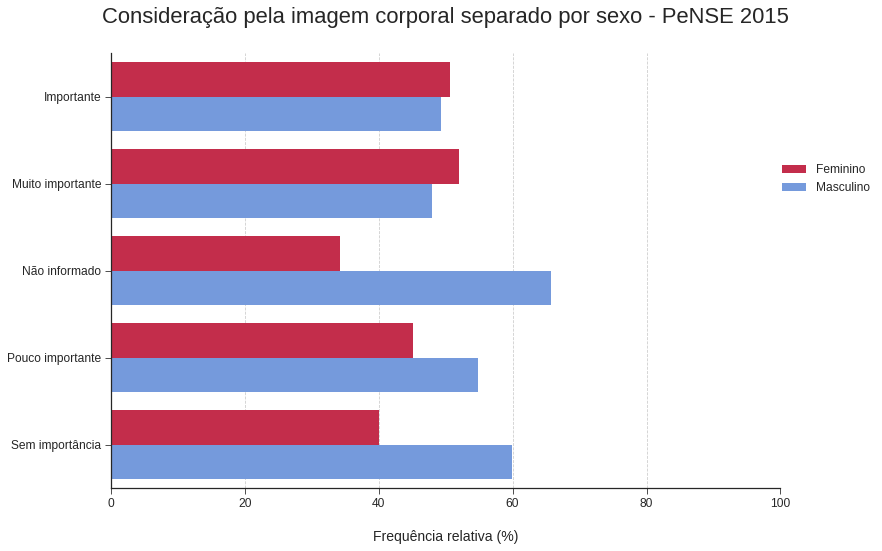

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequência relativa (%)', 
            y='Você considera sua imagem corporal como sendo algo:',
            data=wanted_df, hue='Qual é o seu sexo?',
            palette=['crimson', 'cornflowerblue'])
plt.legend(fontsize=12, bbox_to_anchor=(1.15, 0.77))
plt.xlim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nFrequência relativa (%)', fontsize=14)
plt.ylabel('')
plt.title('Consideração pela imagem corporal separado por sexo - PeNSE 2015\n',
          fontsize=22)
plt.grid(linestyle='--', axis='x')
sns.despine()

###### Teste qui-quadrado
- $H_0$: As considerações pela imagem corporal entre os sexos são iguais.

- $H_1$: As considerações pela imagem corporal entre os sexos são diferentes.

In [ ]:
# Tabela a ser usada (sem o "Não informado")
wanted_df = make_pivot_table('VB11006', 'VB01001', pense_student, 
                             margins=False)
wanted_df = wanted_df[wanted_df.index != 'Não informado']
display(wanted_df)

Qual é o seu sexo?,Feminino,Masculino
Você considera sua imagem corporal como sendo algo:,,
Importante,3344,3260
Muito importante,3691,3411
Pouco importante,890,1079
Sem importância,291,435


In [ ]:
# Teste qui-quadrado
do_chi2_contingency(wanted_df)

- Nível de significância: 0.05
- P-valor: 1.0855254654227481e-12
- Graus de liberdade: 3
- Valor qui-quadrado: 58.75288294596466

- Resultado: rejeição da hipótese nula.


Podemos ver então que, **com uma significância estatística, as considerações pela imagem corporal é diferente entre os adolescentes do sexo masculino e feminino.**



#### **Como você se sente em relação ao seu corpo?**

##### **Adolescentes no geral**

###### Tabela de frequências

In [ ]:
show_freq_table('VB11007', pense_student)

Como você se sente em relação ao seu corpo? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Satisfeito(a),6920,41.80
Muito satisfeito(a),4608,27.83
Insatisfeito(a),2326,14.05
Indiferente,1807,10.91
Muito insatisfeito(a),714,4.31
Não informado,181,1.09


- **Aproximadamente 18% dos entrevistados se sentem insatisfeitos ou muito insatisfeitos em relação ao próprio corpo.**

###### Teste qui-quadrado
- $H_0$: as diferenças entre o número de satisfações distintas em relação ao próprio corpo não são significativas;

- $H_1$: as diferenças entre o número de satisfações distintas em relação ao próprio corpo são significativas;

In [ ]:
wanted_df = make_freq_table('VB11007', pense_student)

In [ ]:
# Tabela sem o "Não informado"
wanted_array = wanted_df[:-1]['Frequência absoluta']
display(wanted_array.to_frame())

,Frequência absoluta
DESCRIÇÃO,
Satisfeito(a),6920
Muito satisfeito(a),4608
Insatisfeito(a),2326
Indiferente,1807
Muito insatisfeito(a),714


In [ ]:
# Teste qui-quadrado
do_chi2(wanted_array)

- Nível de significância: 0.05
- P-valor: 0.0
- Graus de liberdade: 4
- Valor qui-quadrado: 7535.041221374047

- Resultado: rejeição da hipótese nula.


Como rejeitamos a hipótese nula, temos que **as diferenças entre as respostas possuem uma significância estatística alta**.

##### **Comparação entre os sexos**

###### Tabelas de contingência

In [ ]:
show_pivot_table('VB11007', 'VB01001', pense_student)

Tabela dinâmica entre "VB11007" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino,Total
Como você se sente em relação ao seu corpo?,,,
Indiferente,857,950,1807
Insatisfeito(a),1540,786,2326
Muito insatisfeito(a),454,260,714
Muito satisfeito(a),1926,2682,4608
Não informado,62,119,181
Satisfeito(a),3430,3490,6920
Total,8269,8287,16556


In [ ]:
show_percentage_pivot_table('VB11007', 'VB01001', 'index', pense_student)

Tabela dinâmica percentual por linha entre "VB11007" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino
Como você se sente em relação ao seu corpo?,,
Indiferente,47.43,52.57
Insatisfeito(a),66.21,33.79
Muito insatisfeito(a),63.59,36.41
Muito satisfeito(a),41.80,58.20
Não informado,34.25,65.75
Satisfeito(a),49.57,50.43


- **Aparentemente, um pouco mais que 60% dos que responderam insatisfeitos ou muito insatisfeitos com o próprio corpo, foram do sexo feminino.**



###### Gráfico de barras

In [ ]:
# Tabela "melted"
wanted_df = melt_pct_df('VB11007', 'VB01001', 'index', pense_student)

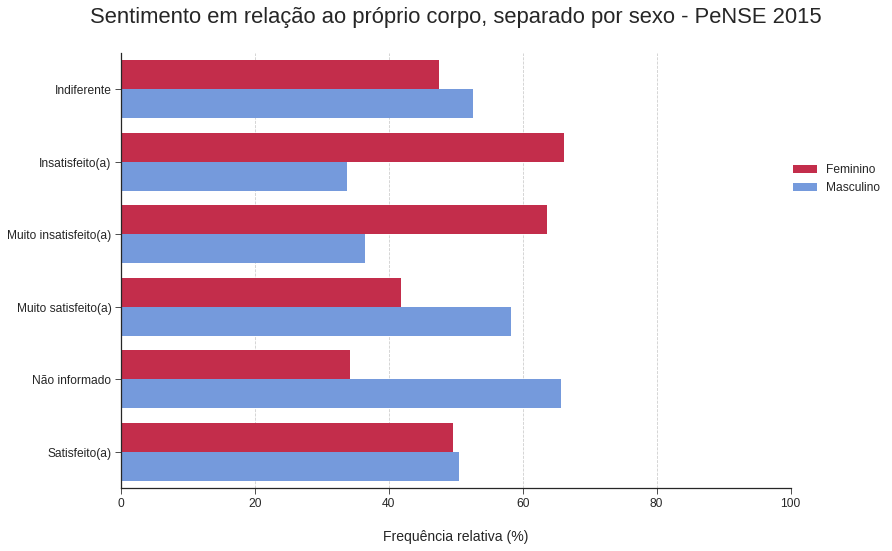

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequência relativa (%)', 
            y='Como você se sente em relação ao seu corpo?',
            data=wanted_df, hue='Qual é o seu sexo?',
            palette=['crimson', 'cornflowerblue'])
plt.legend(fontsize=12, bbox_to_anchor=(1.15, 0.77))
plt.xlim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nFrequência relativa (%)', fontsize=14)
plt.ylabel('')
plt.title('Sentimento em relação ao próprio corpo, separado por sexo - PeNSE 2015\n',
          fontsize=22)
plt.grid(linestyle='--', axis='x')
sns.despine()

###### Teste qui-quadrado
- $H_0$: Os sentimentos em relação ao próprio corpo são iguais entre os sexos.

- $H_1$: Os sentimentos em relação ao próprio corpo são diferentes entre os sexos.

In [ ]:
# Tabela a ser usada (sem o "Não informado")
wanted_df = make_pivot_table('VB11007', 'VB01001', pense_student, 
                             margins=False)
wanted_df = wanted_df[wanted_df.index != 'Não informado']
display(wanted_df)

Qual é o seu sexo?,Feminino,Masculino
Como você se sente em relação ao seu corpo?,,
Indiferente,857,950
Insatisfeito(a),1540,786
Muito insatisfeito(a),454,260
Muito satisfeito(a),1926,2682
Satisfeito(a),3430,3490


In [ ]:
# Teste qui-quadrado
do_chi2_contingency(wanted_df)

- Nível de significância: 0.05
- P-valor: 5.549536555882974e-91
- Graus de liberdade: 4
- Valor qui-quadrado: 426.37676994605016

- Resultado: rejeição da hipótese nula.


Rejeitando a hipótese nula, temos então que **esses sentimentos em relação ao corpo são diferentes para cada sexo, com uma significância estatística alta**.

#### **Como você se considera (massa corpórea)?**

##### **Adolescentes no geral**

###### Tabela de frequências

In [ ]:
show_freq_table('VB11001', pense_student)

Quanto ao seu corpo, você se considera:  



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Normal,8822,53.29
Magro(a),3261,19.70
Gordo(a),2951,17.82
Muito magro(a),952,5.75
Muito Gordo(a),411,2.48
Não informado,159,0.96


- **Aproximadamente 25% dos entrevistados responderam que se consideram magro ou muito magro.**

- **Aproximadamente 20% dos entrevistados responderam que se consideram gordo ou muito gordo.**

###### Teste qui-quadrado
- $H_0$: as diferenças entre o número de impressões distintas em relação ao próprio corpo (massa corporal) não são significativas;

- $H_1$: as diferenças entre o número de impressões distintas em relação ao próprio corpo (massa corporal) são significativas;

In [ ]:
wanted_df = make_freq_table('VB11001', pense_student)

In [ ]:
# Tabela sem o "Não informado"
wanted_array = wanted_df[:-1]['Frequência absoluta']
display(wanted_array.to_frame())

,Frequência absoluta
DESCRIÇÃO,
Normal,8822
Magro(a),3261
Gordo(a),2951
Muito magro(a),952
Muito Gordo(a),411


In [ ]:
# Teste qui-quadrado
do_chi2(wanted_array)

- Nível de significância: 0.05
- P-valor: 0.0
- Graus de liberdade: 4
- Valor qui-quadrado: 13561.355491858267

- Resultado: rejeição da hipótese nula.


Como rejeitamos a hipótese nula, temos que **as diferenças entre as respostas possuem uma significância estatística alta**.

##### **Comparação entre os sexos**

###### Tabelas de contingência

In [ ]:
show_pivot_table('VB11001', 'VB01001', pense_student)

Tabela dinâmica entre "VB11001" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino,Total
"Quanto ao seu corpo, você se considera:",,,
Gordo(a),1722,1229,2951
Magro(a),1478,1783,3261
Muito Gordo(a),287,124,411
Muito magro(a),542,410,952
Normal,4192,4630,8822
Não informado,48,111,159
Total,8269,8287,16556


In [ ]:
show_percentage_pivot_table('VB11001', 'VB01001', 'index', pense_student)

Tabela dinâmica percentual por linha entre "VB11001" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino
"Quanto ao seu corpo, você se considera:",,
Gordo(a),58.35,41.65
Magro(a),45.32,54.68
Muito Gordo(a),69.83,30.17
Muito magro(a),56.93,43.07
Normal,47.52,52.48
Não informado,30.19,69.81


- **Das pessoas que responderam se sentir "muito gordo(a)", aproximadamente 70% foram do sexo feminino**;

- **Das pessoas que responderam se sentir "gordo(a)" ou "muito magro(a)", quase 60% foram do sexo feminino**;

- **Para a resposta "magro(a)", tivemos quase 55% para o sexo masculino**.

###### Gráfico de barras

In [ ]:
# Tabela "melted"
wanted_df = melt_pct_df('VB11001', 'VB01001', 'index', pense_student)

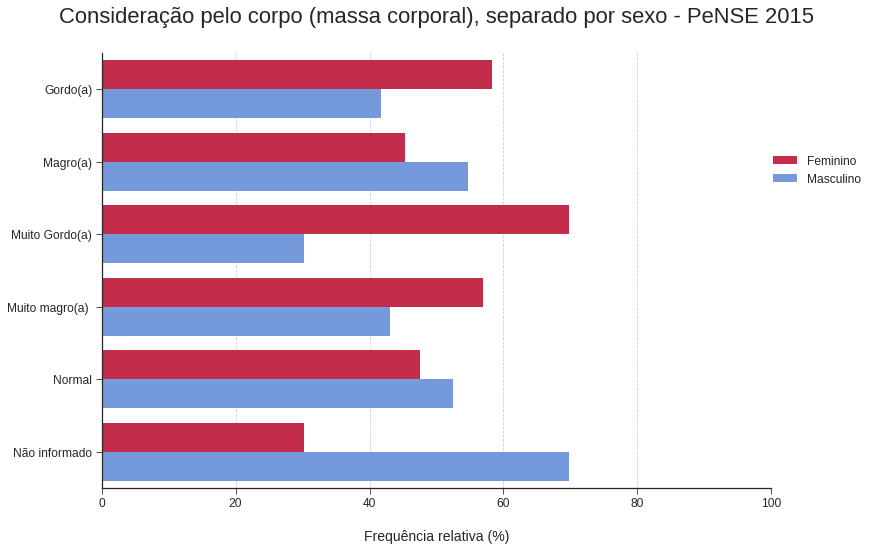

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequência relativa (%)', 
            y='Quanto ao seu corpo, você se considera: ',
            data=wanted_df, hue='Qual é o seu sexo?',
            palette=['crimson', 'cornflowerblue'])
plt.xlim(0, 100)
plt.legend(fontsize=12, bbox_to_anchor=(1.15, 0.79))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nFrequência relativa (%)', fontsize=14)
plt.ylabel('')
plt.title('Consideração pelo corpo (massa corporal), separado por sexo - PeNSE 2015\n',
          fontsize=22)
plt.grid(linestyle='--', axis='x')
sns.despine()

###### Teste qui-quadrado
- $H_0$: As impressões em relação ao próprio corpo (massa corporal) são iguais entre os sexos.
- $H_1$: As impressões em relação ao próprio corpo (massa corporal) são diferentes entre os sexos.

In [ ]:
# Tabela a ser usada (sem o "Não informado")
wanted_df = make_pivot_table('VB11001', 'VB01001', pense_student, 
                             margins=False)
wanted_df = wanted_df[wanted_df.index != 'Não informado']
display(wanted_df)

Qual é o seu sexo?,Feminino,Masculino
"Quanto ao seu corpo, você se considera:",,
Gordo(a),1722,1229
Magro(a),1478,1783
Muito Gordo(a),287,124
Muito magro(a),542,410
Normal,4192,4630


In [ ]:
# Teste qui-quadrado
do_chi2_contingency(wanted_df)

- Nível de significância: 0.05
- P-valor: 1.7778312697042715e-45
- Graus de liberdade: 4
- Valor qui-quadrado: 215.45960172922736

- Resultado: rejeição da hipótese nula.


Rejeitando-se a hipótese nula, temos que **as impressões dos jovens em relação ao próprio corpo (massa corporal) são diferentes entre os sexos**.

#### **NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso?**

##### **Adolescentes no geral**

###### Tabela de frequências

In [ ]:
show_freq_table('VB11003', pense_student)

NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso?  



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,15107,91.25
Sim,1262,7.62
Não informado,187,1.13


- **Aproximadamente 7,5% das pessoas entrevistadas responderam ter vomitado ou tomado lanxante, recentemente, para perder ou evitar ganhar peso.**

###### Teste qui-quadrado
- $H_0$: a diferença entre as frequências dos que vomitaram ou tomaram laxante e dos que não vomitaram ou não tomaram laxante para perder peso recentemente, não é significativa;

- $H_1$: a diferença entre as frequências dos que vomitaram ou tomaram laxante e dos que não vomitaram ou não tomaram laxante para perder peso recentemente, é significativa;

In [ ]:
wanted_df = make_freq_table('VB11003', pense_student)

In [ ]:
# Tabela sem o "Não informado"
wanted_array = wanted_df[:-1]['Frequência absoluta']
display(wanted_array.to_frame())

,Frequência absoluta
DESCRIÇÃO,
Não,15107
Sim,1262


In [ ]:
# Teste qui-quadrado
do_chi2(wanted_array)

- Nível de significância: 0.05
- P-valor: 0.0
- Graus de liberdade: 1
- Valor qui-quadrado: 11710.18541144847

- Resultado: rejeição da hipótese nula.


Como rejeitamos a hipótese nula, temos que **as diferenças entre as respostas possuem uma significância estatística alta**.

##### **Comparação entre os sexos**

###### Tabelas de contingência

In [ ]:
show_pivot_table('VB11003', 'VB01001', pense_student)

Tabela dinâmica entre "VB11003" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino,Total
"NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso?",,,
Não,7559,7548,15107
Não informado,64,123,187
Sim,646,616,1262
Total,8269,8287,16556


In [ ]:
show_percentage_pivot_table('VB11003', 'VB01001', 'index', pense_student)

Tabela dinâmica percentual por linha entre "VB11003" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino
"NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso?",,
Não,50.04,49.96
Não informado,34.22,65.78
Sim,51.19,48.81


- **Aparentemente, não existem diferenças tão abruptas entre as respostas dos dois sexos.**

###### Gráfico de barras

In [ ]:
# Tabela "melted"
wanted_df = melt_pct_df('VB11003', 'VB01001', 'index', pense_student)

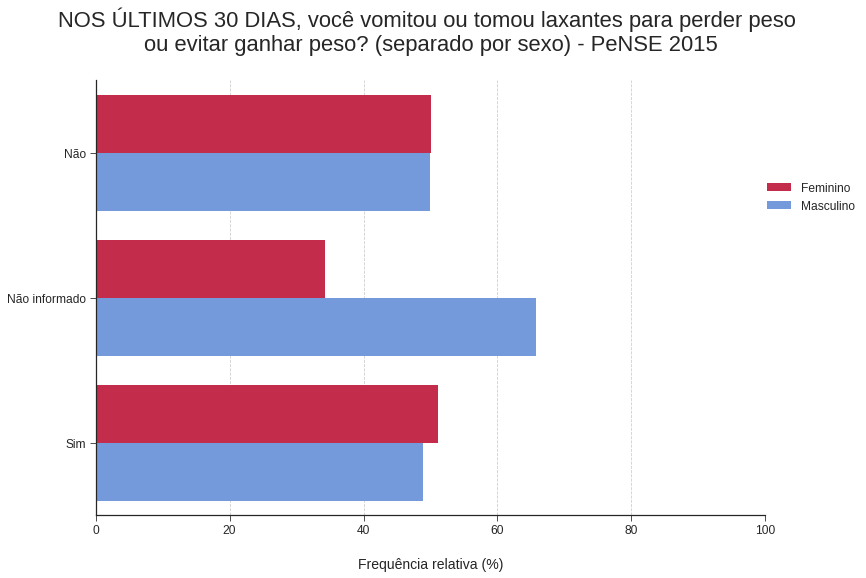

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequência relativa (%)', 
            y='NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso? ',
            data=wanted_df, hue='Qual é o seu sexo?',
            palette=['crimson', 'cornflowerblue'])
plt.legend(fontsize=12, bbox_to_anchor=(1.15, 0.79))
plt.xlim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nFrequência relativa (%)', fontsize=14)
plt.ylabel('')
plt.title('NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso \nou evitar ganhar peso? (separado por sexo) - PeNSE 2015\n',
          fontsize=22)
plt.grid(linestyle='--', axis='x')
sns.despine()

###### Teste qui-quadrado
- $H_0$: As frequências dos que vomitaram ou tomaram laxante recentemente e o caso oposto são iguais entre os sexos.

- $H_1$: As frequências dos que vomitaram ou tomaram laxante recentemente e o caso oposto são diferentes entre os sexos.


In [ ]:
# Tabela a ser usada (sem o "Não informado")
wanted_df = make_pivot_table('VB11003', 'VB01001', pense_student, 
                             margins=False)
wanted_df = wanted_df[wanted_df.index != 'Não informado']
display(wanted_df)

Qual é o seu sexo?,Feminino,Masculino
"NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso?",,
Não,7559,7548
Sim,646,616


In [ ]:
# Teste qui-quadrado
do_chi2_contingency(wanted_df)

- Nível de significância: 0.05
- P-valor: 0.44897270116812815
- Graus de liberdade: 1
- Valor qui-quadrado: 0.5732440201183955

- Resultado: aceitação da hipótese nula.


Como aceitamos a hipótese nula, então **com uma significância estatística, as frequências das respostas desta pergunta são iguais entre os sexos**.

#### **NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?**


##### **Adolescentes no geral**

###### Tabela de frequências

In [ ]:
show_freq_table('VB11004A', pense_student)

NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico? 



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,15243,92.07
Sim,1108,6.69
Não informado,205,1.24


- **Aproximadamente 6,5% das pessoas entrevistadas responderam ter tomado algum produto, recentemente, para perder peso, sem o acompanhamento médico.**

###### Teste qui-quadrado
- $H_0$: a diferença entre as frequências dos que tomaram algum produto ou não recentemente, sem acompanhamento médico, para perder peso, não é significativa;

- $H_1$: a diferença entre as frequências dos que tomaram algum produto ou não recentemente, sem acompanhamento médico, para perder peso, é significativa;

In [ ]:
wanted_df = make_freq_table('VB11004A', pense_student)

In [ ]:
# Tabela sem o "Não informado"
wanted_array = wanted_df[:-1]['Frequência absoluta']
display(wanted_array.to_frame())

,Frequência absoluta
DESCRIÇÃO,
Não,15243
Sim,1108


In [ ]:
# Teste qui-quadrado
do_chi2(wanted_array)

- Nível de significância: 0.05
- P-valor: 0.0
- Graus de liberdade: 1
- Valor qui-quadrado: 12219.32756406336

- Resultado: rejeição da hipótese nula.


Como rejeitamos a hipótese nula, temos que **as diferenças entre as respostas possuem uma significância estatística alta**.

##### **Comparação entre os sexos**

###### Tabelas de contingência

In [ ]:
show_pivot_table('VB11004A', 'VB01001', pense_student)

Tabela dinâmica entre "VB11004A" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino,Total
"NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?",,,
Não,7724,7519,15243
Não informado,75,130,205
Sim,470,638,1108
Total,8269,8287,16556


In [ ]:
show_percentage_pivot_table('VB11004A', 'VB01001', 'index', pense_student)

Tabela dinâmica percentual por linha entre "VB11004A" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino
"NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?",,
Não,50.67,49.33
Não informado,36.59,63.41
Sim,42.42,57.58


- **Dos que responderam que tomaram algum produto para perder peso, recentemente, sem o acompanhamento médico, 57% aproximadamente foram do sexo masculino.**

###### Gráfico de barras

In [ ]:
# Tabela "melted"
wanted_df = melt_pct_df('VB11004A', 'VB01001', 'index', pense_student)

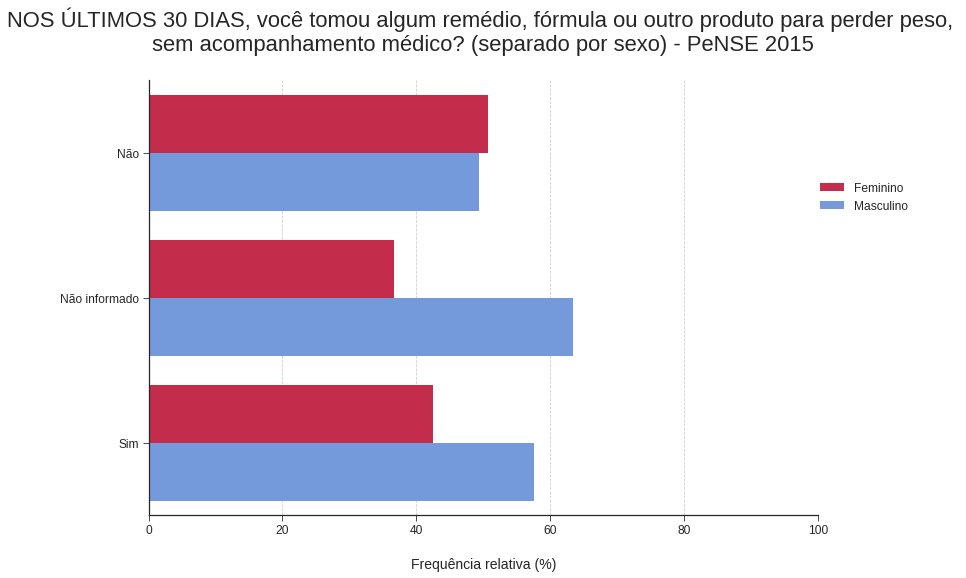

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequência relativa (%)', 
            y='NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?',
            data=wanted_df, hue='Qual é o seu sexo?',
            palette=['crimson', 'cornflowerblue'])
plt.legend(fontsize=12, bbox_to_anchor=(1.15, 0.79))
plt.xlim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nFrequência relativa (%)', fontsize=14)
plt.ylabel('')
plt.title('NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, \nsem acompanhamento médico? (separado por sexo) - PeNSE 2015\n',
          fontsize=22)
plt.grid(linestyle='--', axis='x')
sns.despine()

###### Teste qui-quadrado
- $H_0$: As frequências das respostas dos que tomaram algum produto recentemente e o caso oposto, para perder peso, são iguais entre os sexos.

- $H_1$: As frequências das respostas dos que tomaram algum produto recentemente e o caso oposto, para perder peso, são diferentes entre os sexos.

In [ ]:
# Tabela a ser usada (sem o "Não informado")
wanted_df = make_pivot_table('VB11004A', 'VB01001', pense_student, 
                             margins=False)
wanted_df = wanted_df[wanted_df.index != 'Não informado']
display(wanted_df)

Qual é o seu sexo?,Feminino,Masculino
"NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?",,
Não,7724,7519
Sim,470,638


In [ ]:
# Teste qui-quadrado
do_chi2_contingency(wanted_df)

- Nível de significância: 0.05
- P-valor: 1.3333782319019513e-07
- Graus de liberdade: 1
- Valor qui-quadrado: 27.81716551605338

- Resultado: rejeição da hipótese nula.


Como rejeitamos a hipótese nula, então podemos afirmar que, **com uma significância estatística, as frequências das respostas dos que tomaram algum produto recentemente e o caso oposto, para perder peso, são diferentes entre os sexos.**

#### **NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico?**  

##### **Adolescentes no geral**

###### Tabela de frequências

In [ ]:
show_freq_table('VB11005', pense_student)

NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico?  



,Frequência absoluta,Frequência relativa (%)
DESCRIÇÃO,,
Não,15007,90.64
Sim,1321,7.98
Não informado,228,1.38


- **Aproximadamente 8% das pessoas entrevistadas relataram ter tomado algum produto, recentemente, para ganhar peso ou massa muscular, sem o acompanhamento médico.**

###### Teste qui-quadrado
- $H_0$: a diferença entre as frequências dos que tomaram algum produto ou não recentemente, sem acompanhamento médico, para ganhar peso ou massa muscular, não é significativa;

- $H_1$: a diferença entre as frequências dos que tomaram algum produto ou não recentemente, sem acompanhamento médico, para ganhar peso ou massa muscular, é significativa;

In [ ]:
wanted_df = make_freq_table('VB11005', pense_student)

In [ ]:
# Tabela sem o "Não informado"
wanted_array = wanted_df[:-1]['Frequência absoluta']
display(wanted_array.to_frame())

,Frequência absoluta
DESCRIÇÃO,
Não,15007
Sim,1321


In [ ]:
# Teste qui-quadrado
do_chi2(wanted_array)

- Nível de significância: 0.05
- P-valor: 0.0
- Graus de liberdade: 1
- Valor qui-quadrado: 11471.496570308673

- Resultado: rejeição da hipótese nula.


Como rejeitamos a hipótese nula, temos que **as diferenças entre as respostas possuem uma significância estatística alta**.

##### **Comparação entre os sexos**

###### Tabelas de contingência

In [ ]:
show_pivot_table('VB11005', 'VB01001', pense_student)

Tabela dinâmica entre "VB11005" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino,Total
"NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico?",,,
Não,7703,7304,15007
Não informado,82,146,228
Sim,484,837,1321
Total,8269,8287,16556


In [ ]:
show_percentage_pivot_table('VB11005', 'VB01001', 'index', pense_student)

Tabela dinâmica percentual por linha entre "VB11005" e "VB01001"



Qual é o seu sexo?,Feminino,Masculino
"NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico?",,
Não,51.33,48.67
Não informado,35.96,64.04
Sim,36.64,63.36


- **Um pouco mais que 60% dos que tomaram algum produto, recentemente, para ganhar peso ou massa muscular, sem o acompanhamento médico, foram do sexo masculino.**

###### Gráfico de barras

In [ ]:
# Tabela "melted"
wanted_df = melt_pct_df('VB11005', 'VB01001', 'index', pense_student)

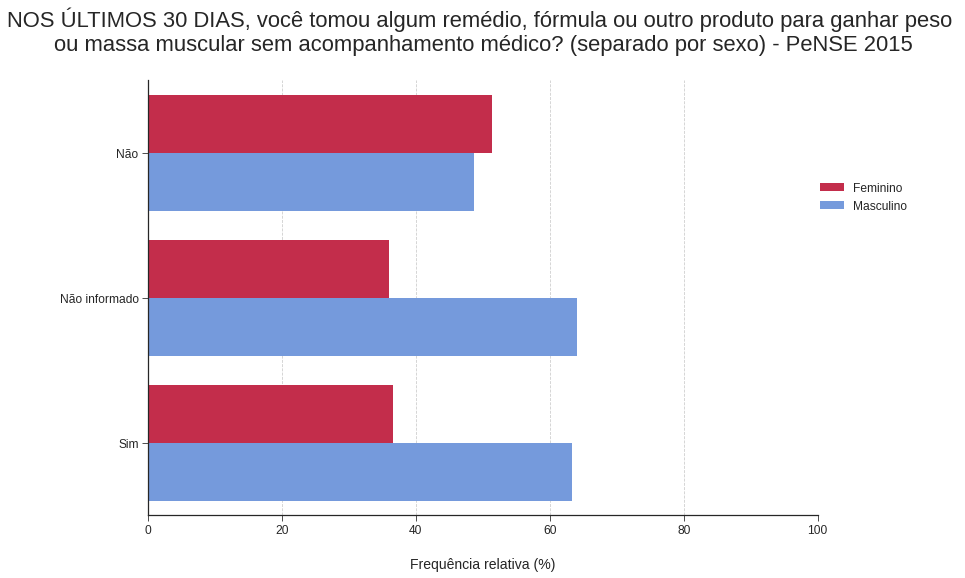

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequência relativa (%)', 
            y='NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico? ',
            data=wanted_df, hue='Qual é o seu sexo?',
            palette=['crimson', 'cornflowerblue'])
plt.legend(fontsize=12, bbox_to_anchor=(1.15, 0.79))
plt.xlim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nFrequência relativa (%)', fontsize=14)
plt.ylabel('')
plt.title('NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso \nou massa muscular sem acompanhamento médico? (separado por sexo) - PeNSE 2015\n',
          fontsize=22)
plt.grid(linestyle='--', axis='x')
sns.despine()

###### Teste qui-quadrado
- $H_0$: As frequências das repostas dos que tomaram algum produto recentemente e o caso oposto, para ganhar peso ou massa muscular, são iguais entre os sexos.
- $H_1$: As frequências dos que tomaram algum produto recentemente e o caso oposto, para ganhar peso ou massa muscular, são diferentes entre os sexos.

In [ ]:
# Tabela a ser usada (sem o "Não informado")
wanted_df = make_pivot_table('VB11005', 'VB01001', pense_student, 
                             margins=False)
wanted_df = wanted_df[wanted_df.index != 'Não informado']
display(wanted_df)

Qual é o seu sexo?,Feminino,Masculino
"NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico?",,
Não,7703,7304
Sim,484,837


In [ ]:
# Teste qui-quadrado
do_chi2_contingency(wanted_df)

- Nível de significância: 0.05
- P-valor: 1.8085427190334293e-24
- Graus de liberdade: 1
- Valor qui-quadrado: 104.22218408988218

- Resultado: rejeição da hipótese nula.


Como rejeitamos a hipótese nula, podemos afirmar que, **com uma significância estatística, as frequências das respotas dos que tomaram algum produto recentemente e o caso oposto, para ganhar peso ou massa muscular, são diferentes entre os sexos.**

---
## **Resumo e Conclusão do Projeto**

Foi um projeto bem trabalhoso, principalmente porque **definir um escopo** para se seguir, dada a quantidade de variáveis, ou seja, assuntos que poderíamos nos aprofundar mais, era muito grande. Mas enfim, foi bem interessante me aprofundar nesse tema, é algo que muitas pessoas acabam deixando de lado, e ele deve ter sua devida atenção, ainda mais quando somos crianças.

Abaixo ficarão listadas todas as conclusões que obtive desse meu projeto.

### **EDA sobre o Bullying**


- **Dos 16.556 adolescentes entrevistados, 45,81% relataram que já sofreram bullying alguma vez na vida.**
- **Aproximadamente 11% dos entrevistados que foram caçoados nos últimos 30 dias, tiveram como motivo principal a aparência do corpo e do rosto.**

### **EDA e Testes de Hipóteses Sobre a Imagem Corporal**

#### **Imagem corporal é importante?**

- **Aproximadamente 80% dos entrevistados responderam que a imagem corporal é importante ou muito importante;**
	- **As diferenças entre as respostas são estatisticamente significativas quando tratamos das pessoas nessa faixa etária**.
- **Aparentemente, as pessoas entrevistadas do sexo feminino possuem uma preocupação um pouco maior com a imagem corporal.**
	- **Com uma significância estatística, as considerações pela imagem corporal é diferente entre os adolescentes do sexo masculino e feminino.**

#### **Como você se sente em relação ao seu corpo?**

- **Aproximadamente 18% dos entrevistados se sentem insatisfeitos ou muito insatisfeitos em relação ao próprio corpo;**
	- **As diferenças entre as respostas possuem uma significância estatística alta**.
- **Aparentemente, um pouco mais que 60% dos que responderam insatisfeitos ou muito insatisfeitos com o próprio corpo, foram do sexo feminino;**
	- **Esses sentimentos em relação ao corpo são diferentes para cada sexo, com uma significância estatística alta**.

#### **Como você se considera (massa corpórea)?**

- **Aproximadamente 25% dos entrevistados responderam que se consideram magro ou muito magro;**
- **Aproximadamente 20% dos entrevistados responderam que se consideram gordo ou muito gordo;**
	- **As diferenças entre as respostas possuem uma significância estatística alta**.
- **Das pessoas que responderam se sentir "muito gordo(a)", aproximadamente 70% foram do sexo feminino**;
- **Das pessoas que responderam se sentir "gordo(a)" ou "muito magro(a)", quase 60% foram do sexo feminino**;
- **Para a resposta "magro(a)", tivemos quase 55% para o sexo masculino**.
	- **As impressões dos jovens em relação ao próprio corpo (massa corporal) são diferentes entre os sexos**.

#### **NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso?**

- **Aproximadamente 7,5% das pessoas entrevistadas responderam ter vomitado ou tomado lanxante, recentemente, para perder ou evitar ganhar peso;**
	- **As diferenças entre as respostas possuem uma significância estatística alta**.
- **Aparentemente, não existem diferenças tão abruptas entre as respostas dos dois sexos.**
	- **Com uma significância estatística, as frequências das respostas desta pergunta são iguais entre os sexos**.

#### **NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?**

- **Aproximadamente 6,5% das pessoas entrevistadas responderam ter tomado algum produto, recentemente, para perder peso, sem o acompanhamento médico;**
	- **As diferenças entre as respostas possuem uma significância estatística alta**.
- **Dos que responderam que tomaram algum produto para perder peso, recentemente, sem o acompanhamento médico, 57% aproximadamente foram do sexo masculino.**
	- **Com uma significância estatística, as frequências das respostas dos que tomaram algum produto recentemente e o caso oposto, para perder peso, são diferentes entre os sexos.**

#### **NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para ganhar peso ou massa muscular sem acompanhamento médico?** 

- **Aproximadamente 8% das pessoas entrevistadas relataram ter tomado algum produto, recentemente, para ganhar peso ou massa muscular, sem o acompanhamento médico;**
	- **As diferenças entre as respostas possuem uma significância estatística alta**.
- **Um pouco mais que 60% dos que tomaram algum produto, recentemente, para ganhar peso ou massa muscular, sem o acompanhamento médico, foram do sexo masculino.**
	- **Com uma significância estatística, as frequências das respotas dos que tomaram algum produto recentemente e o caso oposto, para ganhar peso ou massa muscular, são diferentes entre os sexos.**

---
## **Fontes**
- Sobre imagem corporal:
  - [O que é](https://vilamulher.com.br/familia/criancas/imagem-corporal-infantil-como-estimular-a-autoestima-m0516-720519.html);

  - [Certos cuidados](http://gatda.com.br/index.php/2016/03/29/imagem-corporal-2/).

- Sobre o PeNSE 2015:
  - [Descrição](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e);
  - [Base de dados](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=downloads).